10D cases

C:\Users\lenovo\AppData\Local\Temp\ipykernel_26040\3009711859.py:43: OptimizeWarning: Unknown solver options: gtol
  minimize(rosen, x0, method=method,


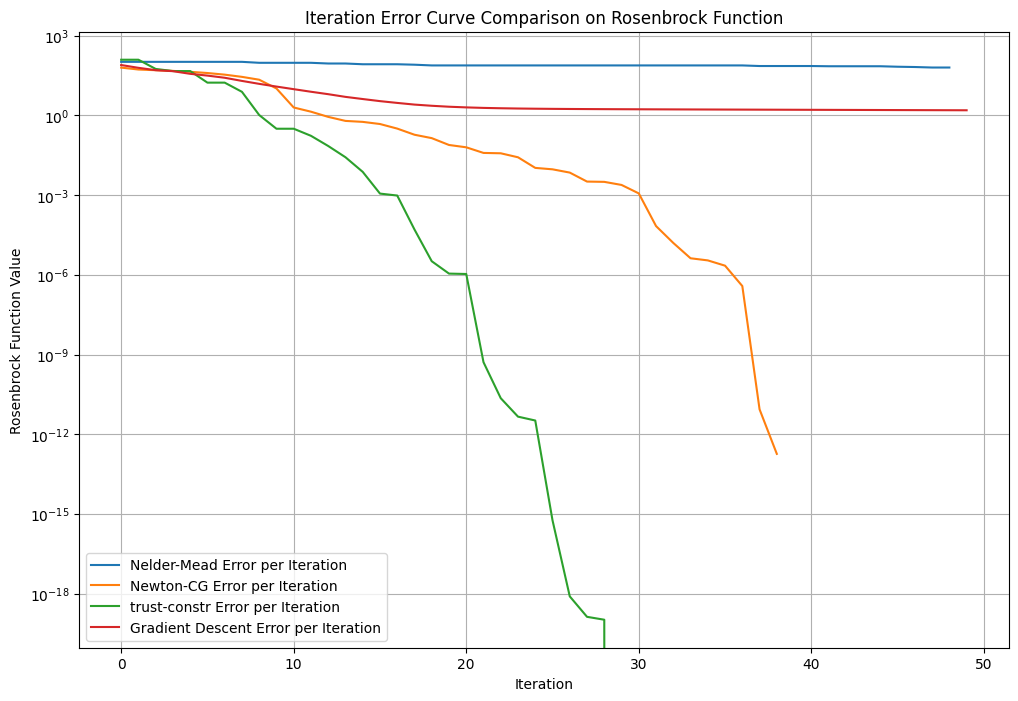

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, line_search
from scipy.optimize import rosen, rosen_der, rosen_hess

# 初始参数
dim = 10
np.random.seed(123)
x0 = np.random.rand(dim)  # 生成一个10维的随机初始向量

# 优化并记录迭代误差
methods = ['Nelder-Mead', 'Newton-CG', 'trust-constr', 'Gradient Descent']
errors = {method: [] for method in methods}

def gradient_descent(func, grad_func, x0, callback=None, alpha0=1, max_iter=50, tol=1e-40):
    x = np.array(x0)
    for i in range(max_iter):
        gradient = grad_func(x)
        # 确定搜索方向是梯度的反方向
        search_dir = -gradient
        # 线搜索确定合适的步长
        line_result = line_search(func, grad_func, x, search_dir)
        alpha = line_result[0]
        if alpha is None:  # 如果line_search失败则回退到初始步长
            alpha = alpha0
        # 更新点
        x = x + alpha * search_dir
        # 调用回调函数来记录误差
        if callback is not None:
            callback(x)
        # 检查收敛性
        if np.linalg.norm (search_dir) < tol:
            break
    return x

def optimize_and_plot(method, jac=None, hess=None):
    def callback(xk, *args):
        errors[method].append(rosen(xk))
        
    if method == 'Gradient Descent':
        gradient_descent(rosen, rosen_der, x0, callback=callback)
    else:
        minimize(rosen, x0, method=method,
                    jac=jac, hess=hess, callback=callback,
                    options={'maxiter': 50, 'gtol': 1e-40})

# 一般梯度下降法 (Nelder-Mead)
optimize_and_plot('Nelder-Mead')

# 牛顿法 (Newton-CG)
optimize_and_plot('Newton-CG', jac=rosen_der, hess=rosen_hess)

# 信赖域方法 (trust-constr)
optimize_and_plot('trust-constr', jac=rosen_der, hess=rosen_hess)

# 简单梯度下降法 (Gradient Descent)
optimize_and_plot('Gradient Descent')

# 绘制迭代误差图
plt.figure(figsize=(12, 8))
for method in methods:
    plt.plot(errors[method], label=f'{method} Error per Iteration')
plt.title("Iteration Error Curve Comparison on Rosenbrock Function")
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Rosenbrock Function Value")
plt.legend()
plt.grid(True)
plt.show()

2D cases

C:\Users\lenovo\AppData\Local\Temp\ipykernel_26040\3970866187.py:19: OptimizeWarning: Unknown solver options: gtol
  res = minimize(rosen, x0, method=method,


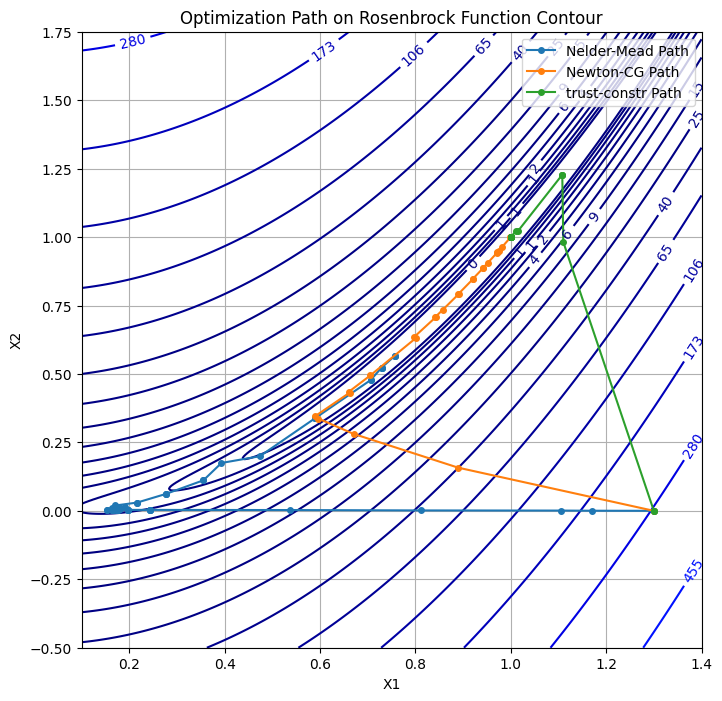

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import rosen, rosen_der, rosen_hess

# 初始参数
x0 = np.array([1.3, 0])

# 优化并记录迭代误差及轨迹
methods = ['Nelder-Mead', 'Newton-CG', 'trust-constr']
errors = {method: [] for method in methods}
traces = {method: [] for method in methods}  # 用于存储轨迹

def optimize_and_plot(method, jac=None, hess=None):
    def callback(xk, *args):
        errors[method].append(rosen(xk))
        traces[method].append(xk)  # 记录轨迹
        
    res = minimize(rosen, x0, method=method,
                   jac=jac, hess=hess, callback=callback, options={'maxiter': 50,'gtol': 1e-40})
    return res

# 使用各种方法优化
res_nm = optimize_and_plot('Nelder-Mead')
res_ncg = optimize_and_plot('Newton-CG', jac=rosen_der, hess=rosen_hess)
res_trust_constr = optimize_and_plot('trust-constr', jac=rosen_der, hess=rosen_hess)

# 生成等高线图数据
x = np.linspace(0.1, 1.4, 400)
y = np.linspace(-0.5, 1.75, 400)
X, Y = np.meshgrid(x, y)
Z = rosen([X, Y])

# 绘制等高线图
plt.figure(figsize=(8, 8))
contour = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap='jet')
plt.clabel(contour, inline=1, fontsize=10)

# 在等高线图上绘制轨迹
for method, trace in traces.items():
    trace = np.array(trace)  # 将轨迹转换为numpy数组以便绘图
    plt.plot(np.insert(trace[:, 0],0,x0[0]), np.insert(trace[:, 1],0,x0[1]), marker='o', markersize=4,label=f'{method} Path')
plt.title("Optimization Path on Rosenbrock Function Contour")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

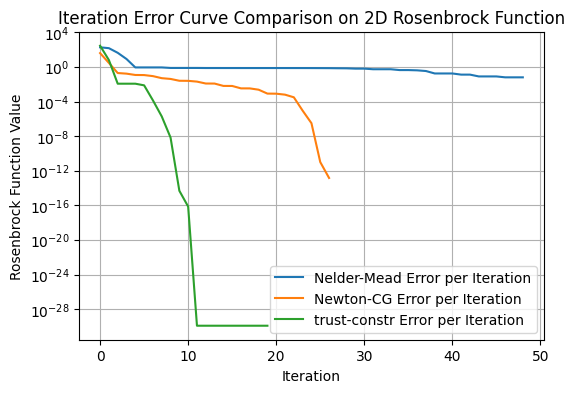

In [25]:
plt.figure(figsize=(6, 4))
for method in methods:
    plt.plot(errors[method], label=f'{method} Error per Iteration')
plt.title("Iteration Error Curve Comparison on 2D Rosenbrock Function")
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Rosenbrock Function Value")
plt.legend()
plt.grid(True)
plt.show()